<a href="https://colab.research.google.com/github/riyanpacul/Home-Credit-Modelling/blob/main/Modelling_Home_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Bismillah

Tujuan analisis dan pemodelan kali ini untuk memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman dapat diberikan dengan principal, maturity, dan repayment calendar yang akan memotivsi pelanggan untuk sukses.

In [3]:
# Replace data.csv with your own file name
app_train = pd.read_csv('/content/drive/MyDrive/application_train.csv')
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_train.shape

(307511, 122)

In [5]:
app_test = pd.read_csv('/content/drive/MyDrive/application_test.csv')
app_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
app_test.shape

(48744, 121)

# Duplicate

In [7]:
app_train.duplicated().sum()

0

In [8]:
app_test.duplicated().sum()

0

# Missing Value

In [9]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
app_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [11]:
app_train.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [12]:
# Fungsi untuk menghitung jumlah missing values berdasarkan kolom
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Missing value percentage
    mis_val_pct = 100 * df.isnull().sum() / len(df)

    # missing value table
    mis_val_tab = pd.concat([mis_val, mis_val_pct], axis=1)

    # Rename the columns
    mis_val_tab_col_renamed = mis_val_tab.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending after removing rows with missing% == 0
    mis_val_tab_col_renamed = mis_val_tab_col_renamed[
        mis_val_tab_col_renamed.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

    # Print summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
           "There are " + str(mis_val_tab_col_renamed.shape[0]) +
           " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_tab_col_renamed

In [13]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [14]:
# Missing values statistics
missing_values = missing_values_table(app_test)
missing_values.head(20)

Your selected dataframe has 121 columns.
There are 64 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


In [15]:
missing_values_col = missing_values[missing_values.iloc[:,1] > 50]
missing_values_col

,Missing Values,% of Total Values
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
COMMONAREA_AVG,33495,68.7
NONLIVINGAPARTMENTS_MEDI,33347,68.4
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2
LIVINGAPARTMENTS_AVG,32780,67.2


In [16]:
missing_values_col = missing_values_col.index.to_list()

In [17]:
app_train = app_train.drop(columns=missing_values_col)

In [18]:
app_test = app_test.drop(columns=missing_values_col)

In [19]:
for col in app_train.select_dtypes(include= 'object').columns:
  print(col)
  print(app_train[col].unique())
  print()

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']

CODE_GENDER
['M' 'F' 'XNA']

FLAG_OWN_CAR
['N' 'Y']

FLAG_OWN_REALTY
['Y' 'N']

NAME_TYPE_SUITE
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

NAME_INCOME_TYPE
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

NAME_EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

NAME_HOUSING_TYPE
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill

In [20]:
for col in app_test.select_dtypes(include= 'object').columns:
  print(col)
  print(app_test[col].unique())
  print()

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']

CODE_GENDER
['F' 'M']

FLAG_OWN_CAR
['N' 'Y']

FLAG_OWN_REALTY
['Y' 'N']

NAME_TYPE_SUITE
['Unaccompanied' nan 'Family' 'Spouse, partner' 'Group of people'
 'Other_B' 'Children' 'Other_A']

NAME_INCOME_TYPE
['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed']

NAME_EDUCATION_TYPE
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS
['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated']

NAME_HOUSING_TYPE
['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

OCCUPATION_TYPE
[nan 'Low-skill Laborers' 'Drivers' 'Sales staff' 'High skill tech staff'
 'Core staff' 'Laborers' 'Managers' 'Accountants' 'Medicine staff'
 'Security staff' 'Private service staff' 'Secretaries' 'Cleaning staff'
 'Cooking staff' 'HR staff' 'Waiters/barmen staff'

In [21]:
app_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [22]:
app_test['CODE_GENDER'].value_counts()

F    32678
M    16066
Name: CODE_GENDER, dtype: int64

In [23]:
app_train['CODE_GENDER'] = app_train['CODE_GENDER'].str.replace('XNA','F')

In [24]:
app_train['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [25]:
app_test['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      39727
Family              5881
Spouse, partner     1448
Children             408
Other_B              211
Other_A              109
Group of people       49
Name: NAME_TYPE_SUITE, dtype: int64

In [26]:
app_train['NAME_TYPE_SUITE'] = app_train['NAME_TYPE_SUITE'].fillna('Unaccompanied')
app_test['NAME_TYPE_SUITE'] = app_test['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [27]:
app_train['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [28]:
app_test['OCCUPATION_TYPE'].value_counts()

Laborers                 8655
Sales staff              5072
Core staff               4361
Managers                 3574
Drivers                  2773
High skill tech staff    1854
Accountants              1628
Medicine staff           1316
Security staff            915
Cooking staff             894
Cleaning staff            656
Private service staff     455
Low-skill Laborers        272
Secretaries               213
Waiters/barmen staff      178
Realty agents             138
HR staff                  104
IT staff                   81
Name: OCCUPATION_TYPE, dtype: int64

In [29]:
app_train['OCCUPATION_TYPE'] = app_train['OCCUPATION_TYPE'].fillna('Laborers')
app_test['OCCUPATION_TYPE'] = app_test['OCCUPATION_TYPE'].fillna('Laborers')

In [30]:
app_train['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [31]:
app_test['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    10840
XNA                        9274
Self-employed              5920
Other                      2707
Medicine                   1716
Government                 1508
Business Entity Type 2     1479
Trade: type 7              1303
School                     1287
Construction               1039
Kindergarten               1038
Business Entity Type 1      887
Transport: type 4           884
Trade: type 3               578
Military                    530
Industry: type 9            499
Industry: type 3            489
Security                    472
Transport: type 2           448
Police                      441
Housing                     435
Industry: type 11           416
Bank                        374
Security Ministries         341
Services                    302
Postal                      294
Agriculture                 292
Restaurant                  284
Trade: type 2               242
University                  221
Industry: type 7            217
Industry

In [32]:
app_train['ORGANIZATION_TYPE'] = app_train['ORGANIZATION_TYPE'].str.replace('XNA','Business Entity Type 3')
app_test['ORGANIZATION_TYPE'] = app_test['ORGANIZATION_TYPE'].str.replace('XNA','Business Entity Type 3')

In [33]:
app_train['HOUSETYPE_MODE'].value_counts()

block of flats      150503
specific housing      1499
terraced house        1212
Name: HOUSETYPE_MODE, dtype: int64

In [34]:
app_test['HOUSETYPE_MODE'].value_counts()

block of flats      24659
specific housing      262
terraced house        204
Name: HOUSETYPE_MODE, dtype: int64

In [35]:
app_train['HOUSETYPE_MODE'] = app_train['HOUSETYPE_MODE'].fillna('block of flats')
app_test['HOUSETYPE_MODE'] = app_test['HOUSETYPE_MODE'].fillna('block of flats')

In [36]:
app_train['WALLSMATERIAL_MODE'].value_counts()

Panel           66040
Stone, brick    64815
Block            9253
Wooden           5362
Mixed            2296
Monolithic       1779
Others           1625
Name: WALLSMATERIAL_MODE, dtype: int64

In [37]:
app_test['WALLSMATERIAL_MODE'].value_counts()

Panel           11269
Stone, brick    10434
Block            1428
Wooden            794
Mixed             353
Monolithic        289
Others            284
Name: WALLSMATERIAL_MODE, dtype: int64

In [38]:
app_train['WALLSMATERIAL_MODE'] = app_train['WALLSMATERIAL_MODE'].fillna('Panel')
app_test['WALLSMATERIAL_MODE'] = app_test['WALLSMATERIAL_MODE'].fillna('Panel')

In [39]:
app_train['EMERGENCYSTATE_MODE'].value_counts()

No     159428
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

In [40]:
app_test['EMERGENCYSTATE_MODE'].value_counts()

No     26179
Yes      356
Name: EMERGENCYSTATE_MODE, dtype: int64

In [41]:
app_train['EMERGENCYSTATE_MODE'] = app_train['EMERGENCYSTATE_MODE'].fillna('No')
app_test['EMERGENCYSTATE_MODE'] = app_test['EMERGENCYSTATE_MODE'].fillna('No')

In [42]:
for col in app_train.select_dtypes(include= ['int','float']).columns:
  app_train[col] = app_train[col].fillna(app_train[col].median())

In [43]:
for col in app_test.select_dtypes(include= ['int','float']).columns:
  app_test[col] = app_test[col].fillna(app_test[col].median())

In [44]:
app_train.isna().sum().max()

0

In [45]:
app_test.isna().sum().max()

0

# Anomali Data

In [46]:
(app_train['DAYS_EMPLOYED'] /-1).describe()

count    307511.000000
mean     -63815.045904
std      141275.766519
min     -365243.000000
25%         289.000000
50%        1213.000000
75%        2760.000000
max       17912.000000
Name: DAYS_EMPLOYED, dtype: float64

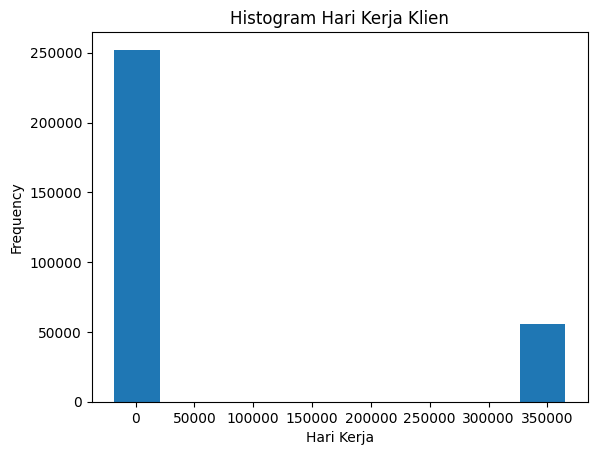

In [47]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Histogram Hari Kerja Klien')
plt.xlabel('Hari Kerja')
plt.show()

In [48]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous values in column days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous values in column days of employment


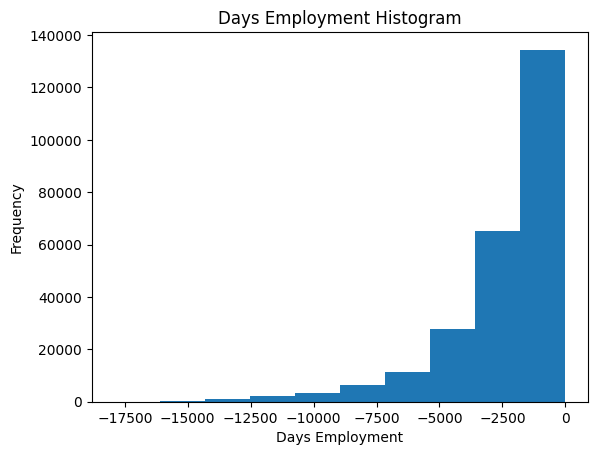

In [49]:
# Membuat kolom anom
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Mengganti nilai anom dengan NaN
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')
plt.show()

<Axes: >

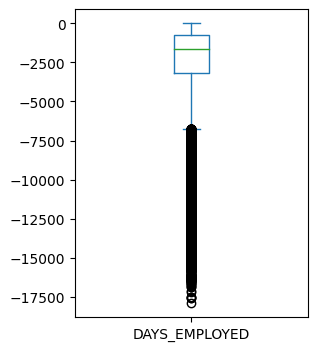

In [50]:
app_train['DAYS_EMPLOYED'].plot(kind='box', figsize=(3,4))

In [51]:
app_train['DAYS_EMPLOYED'] = app_train['DAYS_EMPLOYED'].fillna(app_train['DAYS_EMPLOYED'].median())

In [52]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


<Axes: >

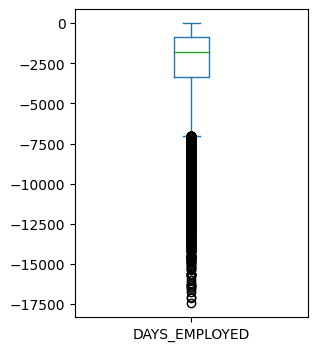

In [53]:
app_test['DAYS_EMPLOYED'].plot(kind='box', figsize=(3,4))

In [54]:
app_test['DAYS_EMPLOYED'] = app_test['DAYS_EMPLOYED'].fillna(app_test['DAYS_EMPLOYED'].median())

# Korelasi

In [55]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031401
DEF_30_CNT_SOCIAL_CIRCLE       0.032394
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_EMPLOYED                  0.063368
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2                 -0.160295
EXT_SOURCE_3                 -0.155892
EXT_SOURCE_1                 -0.098887
DAYS_EMPLOYED_ANOM           -0.045987
AMT_GOODS_PRICE              -0.039623
FLOORSMAX_AVG                -0.039385
FLOORSMAX_MEDI               -0.039157
FLOORSMAX_MODE               -0.038377


# Data Splitting

In [56]:
app_train.shape

(307511, 94)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# Membagi data train menjadi 80% train dan 20% test
x = app_train.drop('TARGET', axis=1)
y = app_train['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, stratify= y, random_state= 42)

In [59]:
y_train.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

In [60]:
y_test.value_counts(normalize=True)

0    0.919272
1    0.080728
Name: TARGET, dtype: float64

# Feature Encoding and Engineering

## Numeric

In [61]:
x_train.select_dtypes(include=['int','float']).columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ENTRANCES_MEDI',
       'F

In [62]:
x_train[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
181648,-12298,-946.0,-6378.0,-4670
229245,-15375,-92.0,-1292.0,-1994
122525,-19307,-1646.0,-7951.0,-2842
306311,-17791,-1651.0,-1033.0,-1345
300658,-8486,-977.0,-2873.0,-852
...,...,...,...,...
31304,-15374,-595.0,-6831.0,-4420
121193,-19035,-4334.0,-8490.0,-2561
248504,-23088,-1648.0,-8975.0,-4636
175469,-22148,-1648.0,-10162.0,-4636


In [63]:
x_train[['FLAG_EMP_PHONE','FLAG_WORK_PHONE']]

,FLAG_EMP_PHONE,FLAG_WORK_PHONE
181648,1,0
229245,1,0
122525,1,0
306311,1,0
300658,1,0
...,...,...
31304,1,1
121193,1,0
248504,0,0
175469,0,0


In [64]:
x_train['DAYS_REGISTRATION'] = x_train['DAYS_REGISTRATION'].astype('int')
x_test['DAYS_REGISTRATION'] = x_test['DAYS_REGISTRATION'].astype('int')

In [65]:
x_train[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
181648,-12298,-946.0,-6378,-4670
229245,-15375,-92.0,-1292,-1994
122525,-19307,-1646.0,-7951,-2842
306311,-17791,-1651.0,-1033,-1345
300658,-8486,-977.0,-2873,-852
...,...,...,...,...
31304,-15374,-595.0,-6831,-4420
121193,-19035,-4334.0,-8490,-2561
248504,-23088,-1648.0,-8975,-4636
175469,-22148,-1648.0,-10162,-4636


In [66]:
x_train[['OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE']]

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
181648,0.0,0.0,0.0,0.0
229245,2.0,0.0,2.0,0.0
122525,1.0,0.0,1.0,0.0
306311,2.0,0.0,2.0,0.0
300658,0.0,0.0,0.0,0.0
...,...,...,...,...
31304,1.0,0.0,1.0,0.0
121193,0.0,0.0,0.0,0.0
248504,1.0,0.0,1.0,0.0
175469,1.0,0.0,1.0,0.0


In [67]:
x_train['DAYS_LAST_PHONE_CHANGE']

181648       0.0
229245    -509.0
122525   -1474.0
306311   -2016.0
300658    -695.0
           ...  
31304     -379.0
121193    -374.0
248504   -1689.0
175469   -1329.0
285162    -720.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 246008, dtype: float64

In [68]:
x_train[['FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_19',
         'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']]

,FLAG_DOCUMENT_3,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
181648,1,0,0,0
229245,1,0,0,0
122525,1,0,0,0
306311,1,0,0,0
300658,1,0,0,0
...,...,...,...,...
31304,0,0,0,0
121193,1,0,0,0
248504,0,0,0,0
175469,1,0,0,0


In [69]:
x_train[['AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
181648,0.0,0.0,0.0,1.0,1.0
229245,0.0,0.0,0.0,0.0,1.0
122525,0.0,0.0,2.0,0.0,2.0
306311,0.0,0.0,0.0,0.0,4.0
300658,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
31304,0.0,0.0,0.0,0.0,1.0
121193,0.0,0.0,0.0,1.0,4.0
248504,0.0,0.0,0.0,0.0,1.0
175469,0.0,0.0,0.0,0.0,5.0


## Categorical

In [70]:
x_train.select_dtypes(include=['object']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [71]:
for col in x_train.select_dtypes(include= 'object').columns:
  print(col)
  print(x_train[col].unique())
  print()

NAME_CONTRACT_TYPE
['Cash loans' 'Revolving loans']

CODE_GENDER
['F' 'M']

FLAG_OWN_CAR
['N' 'Y']

FLAG_OWN_REALTY
['N' 'Y']

NAME_TYPE_SUITE
['Unaccompanied' 'Spouse, partner' 'Family' 'Other_B' 'Children'
 'Group of people' 'Other_A']

NAME_INCOME_TYPE
['Commercial associate' 'Working' 'Pensioner' 'State servant'
 'Businessman' 'Unemployed' 'Student' 'Maternity leave']

NAME_EDUCATION_TYPE
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

NAME_FAMILY_STATUS
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow'
 'Unknown']

NAME_HOUSING_TYPE
['House / apartment' 'Municipal apartment' 'With parents'
 'Rented apartment' 'Co-op apartment' 'Office apartment']

OCCUPATION_TYPE
['Laborers' 'Drivers' 'Accountants' 'Sales staff' 'High skill tech staff'
 'Medicine staff' 'Core staff' 'Security staff' 'Managers'
 'Waiters/barmen staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'IT staff' 'Realty a

Ordinal : FLAG_OWN_CAR, FLAG_OWN_REALTY,
NAME_EDUCATION_TYPE, EMERGENCYSTATE_MODE

Nominal : Other in Ordinal

### FLAG_OWN_CAR

In [72]:
x_train['FLAG_OWN_CAR'].unique()

array(['N', 'Y'], dtype=object)

In [73]:
own_car = {'N':0,'Y':1}

In [74]:
x_train['FLAG_OWN_CAR'] = x_train['FLAG_OWN_CAR'].map(own_car)
x_train['FLAG_OWN_CAR']

181648    0
229245    1
122525    0
306311    0
300658    0
         ..
31304     0
121193    0
248504    0
175469    0
285162    1
Name: FLAG_OWN_CAR, Length: 246008, dtype: int64

In [75]:
x_test['FLAG_OWN_CAR'] = x_test['FLAG_OWN_CAR'].map(own_car)

### FLAG_OWN_REALTY

In [76]:
x_train['FLAG_OWN_REALTY'].unique()

array(['N', 'Y'], dtype=object)

In [77]:
own_realty = {'N':0,'Y':1}

In [78]:
x_train['FLAG_OWN_REALTY'] = x_train['FLAG_OWN_REALTY'].map(own_realty)
x_train['FLAG_OWN_REALTY']

181648    0
229245    1
122525    1
306311    0
300658    1
         ..
31304     1
121193    0
248504    0
175469    1
285162    1
Name: FLAG_OWN_REALTY, Length: 246008, dtype: int64

In [79]:
x_test['FLAG_OWN_REALTY'] = x_test['FLAG_OWN_REALTY'].map(own_realty)

### EMERGENCYSTATE_MODE

In [80]:
x_train['EMERGENCYSTATE_MODE'].unique()

array(['No', 'Yes'], dtype=object)

In [81]:
emergency = {'No':0,'Yes':1}

In [82]:
x_train['EMERGENCYSTATE_MODE'] = x_train['EMERGENCYSTATE_MODE'].map(emergency)
x_train['EMERGENCYSTATE_MODE']

181648    0
229245    0
122525    0
306311    0
300658    0
         ..
31304     0
121193    0
248504    0
175469    0
285162    0
Name: EMERGENCYSTATE_MODE, Length: 246008, dtype: int64

In [83]:
x_test['EMERGENCYSTATE_MODE'] = x_test['EMERGENCYSTATE_MODE'].map(emergency)

### NAME_EDUCATION_TYPE

In [84]:
x_train['NAME_EDUCATION_TYPE'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [85]:
education = {'Lower secondary':1, 'Secondary / secondary special':2, 'Incomplete higher':3,
             'Higher education':4, 'Academic degree':5}

In [86]:
x_train['NAME_EDUCATION_TYPE'] = x_train['NAME_EDUCATION_TYPE'].map(education)
x_train['NAME_EDUCATION_TYPE']

181648    4
229245    2
122525    2
306311    2
300658    3
         ..
31304     2
121193    2
248504    2
175469    2
285162    2
Name: NAME_EDUCATION_TYPE, Length: 246008, dtype: int64

In [87]:
x_test['NAME_EDUCATION_TYPE'] = x_test['NAME_EDUCATION_TYPE'].map(education)

### Nominal

In [88]:
from sklearn.feature_extraction import DictVectorizer

In [89]:
dv = DictVectorizer(sparse=False)

In [90]:
x_train_dict = x_train.to_dict(orient='records')
x_test_dict = x_test.to_dict(orient='records')

In [91]:
x_train_dict = dv.fit_transform(x_train_dict)
x_test_dict = dv.transform(x_test_dict)

In [92]:
x_train = pd.DataFrame(x_train_dict, columns=dv.get_feature_names_out())
x_test = pd.DataFrame(x_test_dict, columns=dv.get_feature_names_out())

# Modelling

## Logictic Regression

In [93]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C=0.001, solver='liblinear', max_iter=100)
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)

In [94]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_pred)
matrix

array([[56538,     0],
       [ 4965,     0]])

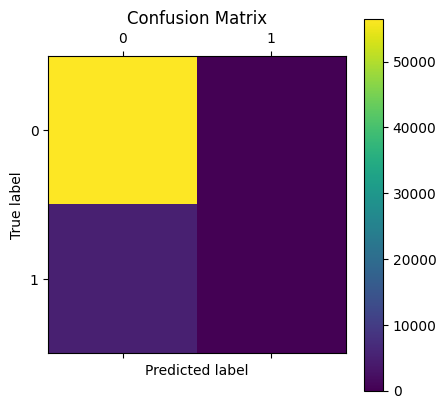

In [95]:
import matplotlib.pyplot as plt

plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [96]:
tn, fp, fn, tp = matrix.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 56538
FP: 0
FN: 4965
TP: 0


In [97]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9192722306228964

In [98]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.0

In [99]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.0

In [100]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.0

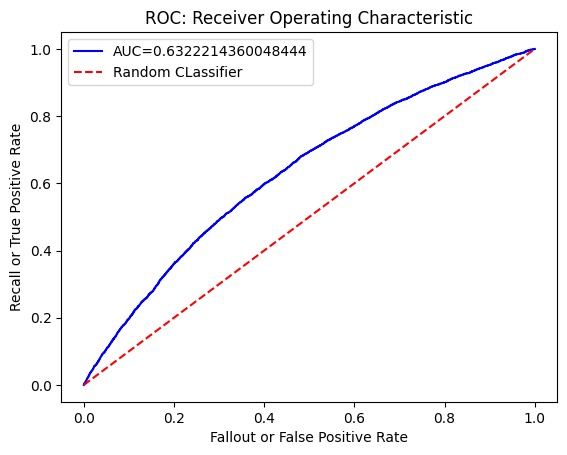

In [101]:
from sklearn.metrics import roc_curve, auc

prob_estimates = log_reg.predict_proba(x_test)

fpr, tpr, threshhold = roc_curve(y_test, prob_estimates[:, 1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random CLassifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()

## Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [103]:
# Train on the training data
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


In [104]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[56535,     3],
       [ 4959,     6]])

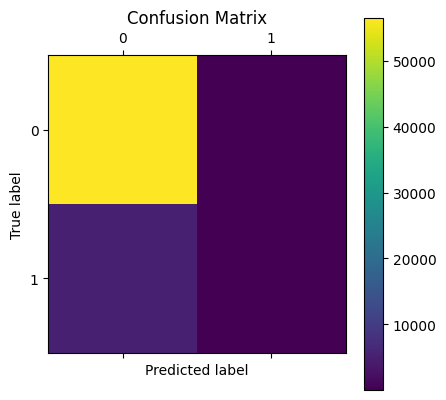

In [105]:
plt.matshow(matrix)
plt.colorbar()

plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [106]:
tn, fp, fn, tp = matrix.ravel()

print(f'TN: {tn}')
print(f'FP: {fp}')
print(f'FN: {fn}')
print(f'TP: {tp}')

TN: 56535
FP: 3
FN: 4959
TP: 6


In [107]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9193210087312814

In [108]:
precision_score(y_test, y_pred)

0.6666666666666666

In [109]:
recall_score(y_test, y_pred)

0.0012084592145015106

In [110]:
f1_score(y_test, y_pred)

0.0024125452352231607

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


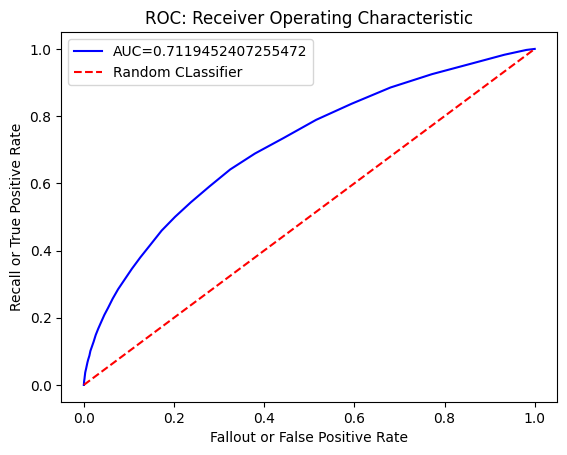

In [111]:
prob_estimates = random_forest.predict_proba(x_test)

fpr, tpr, threshhold = roc_curve(y_test, prob_estimates[:, 1])
nilai_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label=f'AUC={nilai_auc}')
plt.plot([0,1], [0,1], 'r--', label='Random CLassifier')

plt.title('ROC: Receiver Operating Characteristic')
plt.xlabel('Fallout or False Positive Rate')
plt.ylabel('Recall or True Positive Rate')
plt.legend()
plt.show()

Di antara kedua model tersebut, dipilih model Random Forest karena memiliki nilai AUC = 0,72

## Prediction

In [112]:
app_test.select_dtypes(include=['int','float']).columns

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ENTRANCES_MEDI',
       'F

In [113]:
app_test[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-19241,-2329.0,-5170.0,-812
1,-18064,-4469.0,-9118.0,-1623
2,-20038,-4458.0,-2175.0,-3503
3,-13976,-1866.0,-2000.0,-4208
4,-13040,-2191.0,-4000.0,-4262
...,...,...,...,...
48739,-19970,-5169.0,-9094.0,-3399
48740,-11186,-1149.0,-3015.0,-3003
48741,-15922,-3037.0,-2681.0,-1504
48742,-13968,-2731.0,-1461.0,-1364


In [114]:
app_test['DAYS_REGISTRATION'] = app_test['DAYS_REGISTRATION'].astype('int')

In [115]:
app_test['FLAG_OWN_CAR'] = app_test['FLAG_OWN_CAR'].map(own_car)
app_test['FLAG_OWN_CAR']

0        0
1        0
2        1
3        0
4        1
        ..
48739    0
48740    0
48741    1
48742    0
48743    1
Name: FLAG_OWN_CAR, Length: 48744, dtype: int64

In [116]:
app_test['FLAG_OWN_REALTY'] = app_test['FLAG_OWN_REALTY'].map(own_realty)
app_test['FLAG_OWN_REALTY']

0        1
1        1
2        1
3        1
4        0
        ..
48739    1
48740    0
48741    1
48742    0
48743    0
Name: FLAG_OWN_REALTY, Length: 48744, dtype: int64

In [117]:
app_test['EMERGENCYSTATE_MODE'] = app_test['EMERGENCYSTATE_MODE'].map(emergency)
app_test['EMERGENCYSTATE_MODE']

0        0
1        0
2        0
3        0
4        0
        ..
48739    0
48740    0
48741    0
48742    0
48743    0
Name: EMERGENCYSTATE_MODE, Length: 48744, dtype: int64

In [118]:
app_test['NAME_EDUCATION_TYPE'] = app_test['NAME_EDUCATION_TYPE'].map(education)
app_test['NAME_EDUCATION_TYPE']

0        4
1        2
2        4
3        2
4        2
        ..
48739    2
48740    2
48741    2
48742    4
48743    2
Name: NAME_EDUCATION_TYPE, Length: 48744, dtype: int64

In [119]:
app_test_dict = app_test.to_dict(orient='records')
app_test_dict = dv.fit_transform(app_test_dict)
app_test = pd.DataFrame(app_test_dict, columns=dv.get_feature_names_out())

In [120]:
x_train_final = pd.concat([x_train, x_test])
y_train_final = pd.concat([y_train, y_test])

In [121]:
x_train_final.shape

(307511, 205)

In [122]:
app_test.shape

(48744, 203)

In [123]:
x_train_final[['NAME_FAMILY_STATUS=Unknown','NAME_INCOME_TYPE=Maternity leave']]

,NAME_FAMILY_STATUS=Unknown,NAME_INCOME_TYPE=Maternity leave
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
61498,0.0,0.0
61499,0.0,0.0
61500,0.0,0.0
61501,0.0,0.0


In [124]:
x_train_final = x_train_final.drop(columns=['NAME_FAMILY_STATUS=Unknown','NAME_INCOME_TYPE=Maternity leave'])

In [125]:
random_forest.fit(x_train_final, y_train_final)
y_pred = random_forest.predict_proba(app_test)[:,1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.0min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.9s finished


In [126]:
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = y_pred
submit.head()

,SK_ID_CURR,TARGET
0,100001.0,0.15
1,100005.0,0.15
2,100013.0,0.11
3,100028.0,0.05
4,100038.0,0.09


# Interpretasi

In [127]:
!pip install shap

In [128]:
import shap

In [ ]:
# menghitung shap values
explainer = shap.TreeExplainer(random_forest)
shap_values = explainer.shap_values(app_test)

In [ ]:
# plot
plt.title('SHAP Summary for Top 10 Features', size=16)
shap.summary_plot(shap_values[1], app_test, max_display=10, plot_size=[12,8])